           x1        x2  y
293  0.613537 -1.395451  0
123 -0.825694 -1.495779  0
939 -1.059032  0.684527  1
38   0.537367  1.072223  1
831 -0.674588 -0.997182  0
..        ...       ... ..
379 -0.095700 -1.021838  0
519  0.696688 -1.326943  0
416  0.105357 -0.738625  0
562  1.167634  1.314386  1
989 -0.403834 -1.141732  0

[800 rows x 3 columns]
[[ 13.81791164]
 [193.31755662]] [[  -0.84167187]
 [-203.57198134]]
(2, 2)
[[ 0.96721481 -0.03938242]
 [-0.03938242  0.22193296]]
[[ 0.8662443  -0.00982434]
 [-0.00982434  0.10531431]]
sw_inverse:    [[0.5476271  0.08234433]
 [0.08234433 3.06817508]]
w: [[  40.70959011]
 [1218.93372385]]
(2, 1)
[0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0

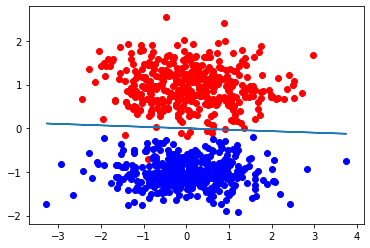

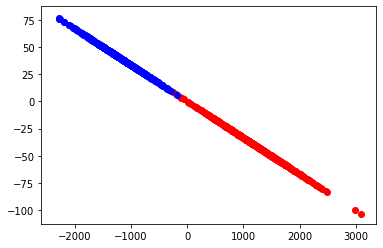

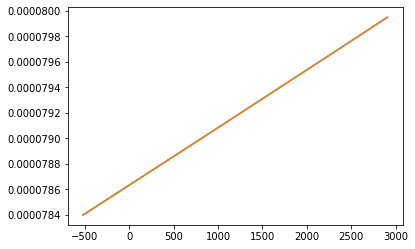

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

def accuracy_score(c,t):
    return (c/t)*100
  
#Fisher's Linear Discriminant for a1_d1
df=pd.read_csv('a1_d1.csv', header=None)
df1=df.sample(frac=0.8,random_state=1111)
df2=df.drop(df1.index)
df1.columns=['x1','x2','y']
df2.columns=['x1','x2','y']
X_train=df1.drop(columns='y')
Y_train=df1['y']
X_test=df2.drop(columns='y')
Y_test=df2['y']
df2.to_numpy()
df1.to_numpy()
print(df1)
m1=[]
x1_c1=[] 
x2_c1=[]
x1_c2=[] 
x2_c2=[]
i=0
for i in range(len(df1)):
    if df1.iloc[i,2]==1:
        x1_c1.append(df1.iloc[i,0])
        x2_c1.append(df1.iloc[i,1])
        i=i+1
    elif df1.iloc[i,2]==0:
        x1_c2.append(df1.iloc[i,0])
        x2_c2.append(df1.iloc[i,1])
        i=i+1


x1_c1=np.array(x1_c1)
x2_c1=np.array(x2_c1)  
x1_c2=np.array(x1_c2)
x2_c2=np.array(x2_c2)
x_c1=(x1_c1,x2_c1)
x_c1=np.array(x_c1)
x_c2=(x1_c2,x2_c2)
x_c2=np.array(x_c2)
sum_1=(x1_c1.sum(),x2_c1.sum()) 
sum_1=np.array(sum_1)
m1=np.array(m1)
m1=(1/len(x_c1))*(sum_1)#Mean of Class c1 i.e belonging to class 1
m1=m1.reshape(-1,1)

sum_2=(x1_c2.sum(),x2_c2.sum())  #Mean of Class c2
sum_2=np.array(sum_2)
m2=(1/len(x_c2))*(sum_2)
m2=np.array(m2)
m2=m2.reshape(-1,1)
print(m1, m2)
print((((x_c1.T)[0].reshape(-1,1)-m1).dot((((x_c1.T)[0].reshape(-1,1)-m1).T))).shape)
# Now, we compute within class covariance matrix
s1=np.cov(x_c1)
s2=np.cov(x_c2)
print(s1)
print(s2)
sw=s1+s2
sw=np.array(sw)
#sw_inverse
sw_inverse= np.linalg.inv(sw)
print(f"sw_inverse:    {sw_inverse}")

#Finding the optimal direction
w=sw_inverse.dot(m1-m2)
print(f"w: {w}")
print(w.shape)




#coverted 2d to 1D points
x_c1_1d=(w.T).dot(x_c1)
x_c2_1d=(w.T).dot(x_c2)
(w1,w2)=w
m=-(w1/w2)

#converting testing data 2d to 1D
x_1d_t=(X_test).dot(w)
x_1d_t=np.array(x_1d_t)
i=0
y_pred=[]
for i in range(len(x_1d_t)):
    if (x_1d_t[i])>0:
        y_pred.append(1)
    elif x_1d_t[i]<0:
        y_pred.append(0)
    i+=1

print(y_pred)
y_pred=np.array((y_pred))
Y_test=np.array(Y_test)
i=0
sum=0
for i in range(len(y_pred)):
    if y_pred[i]==Y_test[i]:
        sum+=1
    i=i+1

print('sum:',sum)
print('accuracy_score', accuracy_score(sum,len(Y_test)))
#plotting the 2D points along with the classifier
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(x1_c1,x2_c1,c='Red') #belonging to class1
ax1.scatter(x1_c2,x2_c2,c='Blue')
ax1.plot(df1.x1, m*(df1.x1) )

#plotting transformed points on the line
fig = plt.figure()
ax2 = fig.add_subplot(111)
ax2.scatter(x_c1_1d, m*(x_c1_1d), c='Red')
ax2.scatter(x_c2_1d, m*(x_c2_1d), c='Blue')


#plotting the normal distribution for both the classes and finding the threshold point
mean_c1=np.mean(x_c1_1d)
var_c1=np.var(x_c1_1d)
mean_c2=np.mean(x_c1_1d)
var_c2=np.var(x_c2)
sigma = np.sqrt(var_c1)
x_c1_1d= np.linspace(mean_c1 - 3*sigma,mean_c1 + 3*sigma, 100)
x2 = np.linspace(mean_c2 - 3*sigma,mean_c2 + 3*sigma, 100)
fig = plt.figure()
ax3 = fig.add_subplot(111)
ax3.plot(x_c1_1d, norm.pdf(x1, mean_c1, sigma))
ax3.plot(x2, norm.pdf(x1, mean_c1, sigma))
print(w2/w1)

In [ ]:
i=0
#print(((x_c1.T)[0].reshape(-1,1)-m1).dot((((x_c1.T)[0].reshape(-1,1)-m1).T)))
#print(len(x_c1.T))
#print(((((x_c1.T)[0]).T-m1.T).dot(((((x_c1.T)[0]).T-m1.T).T))))
#for i in range(len(x_c1.T)):   
#    np.stack((s1,(((x_c1.T)[i].reshape(-1,1)-m1).dot((((x_c1.T)[i].reshape(-1,1)-m1).T)))),axis=0)
#    s2=((x_c1.T)[0].reshape(-1,1)-m1).dot((((x_c1.T)[0].reshape(-1,1)-m1).T))
#    i=i+1
#(np.transpose(np.transpose(x_c1))[0]-m1)

In [109]:
#Fisher's Linear Discriminant for a1_d2
df1=pd.read_csv('a1_d2.csv', header=None)
df1.columns=['x1','x2','x3','y']
df1.to_numpy()
print(df1)
x1_c1=[] 
x2_c1=[]
x1_c2=[] 
x2_c2=[]
x3_c2=[]
x3_c1=[]
i=0
for i in range(len(df1)):
    if df1.iloc[i,3]==1:
        x1_c1.append(df1.iloc[i,0])
        x2_c1.append(df1.iloc[i,1])
        x3_c1.append(df1.iloc[i,2])
        i=i+1
    elif df1.iloc[i,3]==0:
        x1_c2.append(df1.iloc[i,0])
        x2_c2.append(df1.iloc[i,1])
        x3_c2.append(df1.iloc[i,2])
        i=i+1

x1_c1=np.array(x1_c1)
x2_c1=np.array(x2_c1)  
x1_c2=np.array(x1_c2)
x2_c2=np.array(x2_c2)
x3_c1=np.array(x3_c1)
x3_c2=np.array(x3_c2)
x_c1=(x1_c1,x2_c1,x3_c1)
x_c1=np.array(x_c1)
x_c2=(x1_c2,x2_c2,x3_c2)
x_c2=np.array(x_c2)
sum_1=(x1_c1.sum(),x2_c1.sum(),x3_c1.sum()) 
sum_1=np.array(sum_1)
m1=np.array(m1)
m1=(1/len(x_c1))*(sum_1)#Mean of Class c1 i.e belonging to class 1
m1=m1.reshape(-1,1)

sum_2=(x1_c2.sum(),x2_c2.sum(),x3_c2.sum())  #Mean of Class c2
sum_2=np.array(sum_2)
m2=(1/len(x_c2))*(sum_2)
m2=np.array(m2)
m2=m2.reshape(-1,1)

print(m1,m2)
s1=np.cov(x_c1)
s2=np.cov(x_c2)
print(s1)
print(s2)
sw=s1+s2
sw=np.array(sw)
#sw_inverse
sw_inverse= np.linalg.inv(sw)
print(f"sw_inverse:    {sw_inverse}")

#Finding the optimal direction
w=sw_inverse.dot(m1-m2)
print(f"w: {w}")
print(w.shape)
#coverted 2d to 1D points
x_c1_1d=(w.T).dot(x_c1)
x_c2_1d=(w.T).dot(x_c2)
(w1,w2,w3)=w
print(x_c1.shape)

accuracy_score()

           x1        x2        x3  y
0   -6.672418 -1.206198 -1.081050  0
1    1.675598  0.614994 -0.971600  0
2   -4.039058  0.335102  0.544618  1
3    0.793526 -0.235277  0.551771  1
4    3.820273 -0.274691  0.454743  1
..        ...       ...       ... ..
995 -3.680139  0.966962 -0.904337  0
996 -4.063900  0.802611  1.023708  1
997 -0.814430 -0.693945  0.876776  1
998 -0.325122 -0.759024  1.299772  1
999 -1.503431 -0.269458 -1.124390  0

[1000 rows x 4 columns]
[[ 37.18384775]
 [  0.42643146]
 [168.37845316]] [[  17.04913835]
 [  17.22836831]
 [-167.52166603]]
[[8.4444018  0.00952549 0.12606144]
 [0.00952549 0.99261822 0.02692698]
 [0.12606144 0.02692698 0.15425788]]
[[ 9.71467121e+00 -2.07122216e-01  1.18518089e-04]
 [-2.07122216e-01  9.83737616e-01 -1.09759042e-03]
 [ 1.18518089e-04 -1.09759042e-03  2.54690383e-02]]
sw_inverse:    [[ 0.0554112   0.00605983 -0.03977314]
 [ 0.00605983  0.50759661 -0.07720347]
 [-0.03977314 -0.07720347  5.60301539]]
w: [[ -12.34593172]
 [ -34.3392482

<function sklearn.metrics.classification.accuracy_score(y_true, y_pred, normalize=True, sample_weight=None)>

In [ ]:
#naive bayes classifier
